## Thinking probabilistically - Continuous variables

It’s time to move onto continuous variables, such as those that can take on any fractional value. Many of the principles are the same, but there are some subtleties. At the end of this final chapter, you will be speaking the probabilistic language you need to launch into the inference techniques covered in the sequel to this course.

### The Normal PDF
In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.

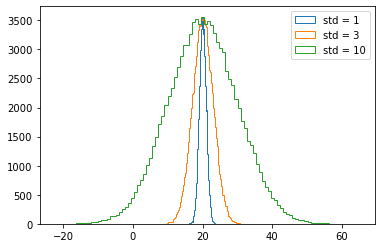

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20,1, size =100000)
samples_std3 = np.random.normal(20,3, size = 100000)
samples_std10 = np.random.normal(20,10, size = 100000)
# Make histograms
plt.hist(samples_std1, bins = 100, histtype = 'step')
plt.hist(samples_std3, bins = 100, histtype = 'step')
plt.hist(samples_std10, bins = 100, histtype = 'step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.show()

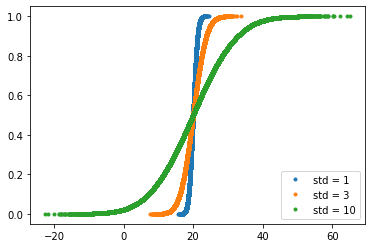

In [11]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x= np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1,y_std1, marker = '.', linestyle = 'none')
plt.plot(x_std3,y_std3, marker = '.', linestyle = 'none')
plt.plot(x_std10,y_std10, marker = '.', linestyle = 'none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

### If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it. We'll do that in this and the next exercise.

In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Now, you will write a function to sample out of the distribution described by this story.

In [13]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size = size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size = size)

    return t1 + t2

### Distribution of no-hitters and cycles
Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

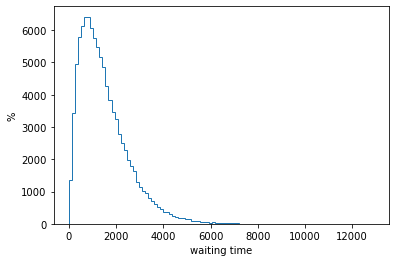

In [15]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
plt.hist(waiting_times, bins = 100, histtype = 'step')


# Label axes
plt.xlabel('waiting time')
plt.ylabel('%')

# Show the plot
plt.show()